In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
df = pd.read_csv("/Users/sa10/Downloads/Financial Fraud Detection TLAB/Financial-Fraud-Detection/data/new_data.csv")

In [4]:
x = df.drop(columns=["isFraud"])
y = df["isFraud"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Logistic Regression Modeling

In [6]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# train the logistic regression model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(x_train_scaled, y_train)

# predict on the test set
predlog = logreg.predict(x_test_scaled)

# evaluate the model
print(accuracy_score(y_test, predlog))
print(confusion_matrix(y_test, predlog))
print(classification_report(y_test, predlog))


0.9991819407728263
[[1270852      52]
 [    989     631]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.92      0.39      0.55      1620

    accuracy                           1.00   1272524
   macro avg       0.96      0.69      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524



In [12]:
model = LogisticRegression(multi_class="ovr", class_weight="balanced")
# fit the model
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='ovr')

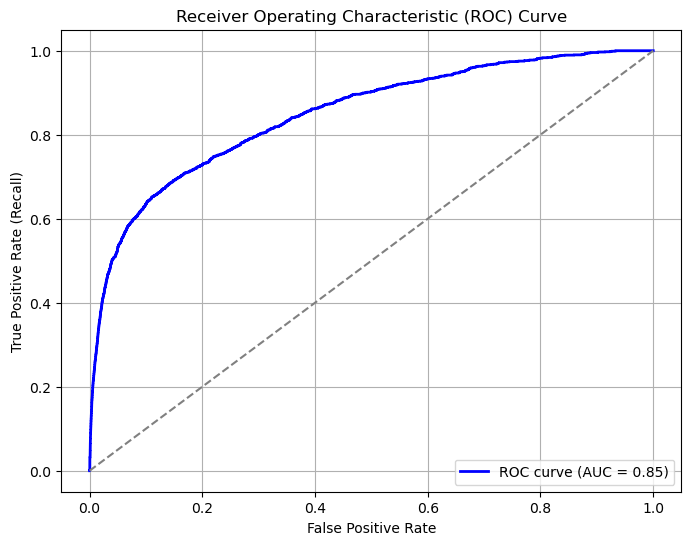

In [19]:
# predicted probabilities
y_pred_prob = model.predict_proba(x_test)[:, 1]

# compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# compute AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# kNN Modeling

In [7]:
# hyperparameter tuning for kNN
paramgrid = {'n_neighbors': [3, 5, 7, 9]} # values to test
gridknn = GridSearchCV(KNeighborsClassifier(), paramgrid, cv=5, scoring='f1') 
gridknn.fit(x_train, y_train)

# train
knn = KNeighborsClassifier(n_neighbors=gridknn.best_params_['n_neighbors'])
knn.fit(x_train, y_train)

# predict
ypredknn = knn.predict(x_test)
# evaluate
print(accuracy_score(y_test, ypredknn))
print(confusion_matrix(y_test, ypredknn))
print(classification_report(y_test, ypredknn))

0.9992825282666574
[[1270865      39]
 [    874     746]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.95      0.46      0.62      1620

    accuracy                           1.00   1272524
   macro avg       0.97      0.73      0.81   1272524
weighted avg       1.00      1.00      1.00   1272524



# Naive Bayes Modeling

In [9]:
# train the naive bayes model
nb = GaussianNB()
nb.fit(x_train, y_train)
# predict
yprednb = nb.predict(x_test)
# evaluate
print(accuracy_score(y_test, yprednb))
print(confusion_matrix(y_test, yprednb))
print(classification_report(y_test, yprednb))

0.9987269395311994
[[1270904       0]
 [   1620       0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.00      0.00      0.00      1620

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


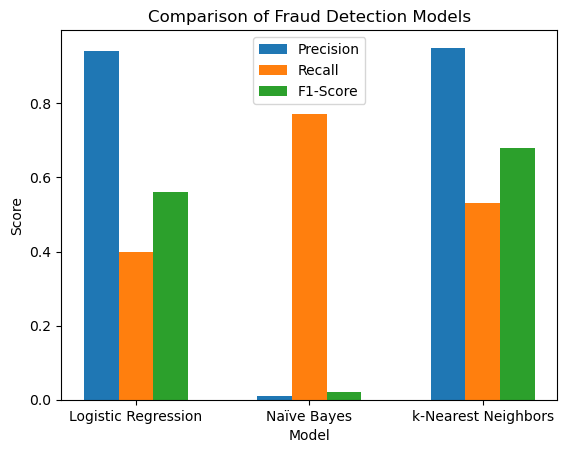

In [ ]:
# models and scores
models = ["Logistic Regression", "Naïve Bayes", "k-Nearest Neighbors"]
precision = [0.94, 0.01, 0.95]
recall = [0.40, 0.77, 0.53]
f1_score = [0.56, 0.02, 0.68]

# arrays for positioning
x = np.arange(len(models))
width = 0.2

# bar chart
fig, ax = plt.subplots()
ax.bar(x - width, precision, width, label='Precision')
ax.bar(x, recall, width, label='Recall')
ax.bar(x + width, f1_score, width, label='F1-Score')

# labels and title
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.set_xlabel("Model")
ax.set_ylabel("Score")
ax.set_title("Comparison of Fraud Detection Models")
ax.legend()

# show plot
plt.show()
